<center>
   <img src="logounam.png"width="150">
</center>


  <font size="6"><b> <center> Universidad Nacional Autónoma de México     </b> <br> </font>
  <font size="4"><b> <center> Posgrado en Ciencias de la Tierra </b><br> </font>
  <font size="3"> <center> 1D CNN implementation for Seismic Event detection in Paricutin Data </b> <br> </font>
  <font size="3"><b> <center>@Author: MSc. Kevin Axel Vargas-Zamudio </b> <br> </font>
  <font size="3"><b> <center>email: seismo.ai.kevvargas@gmail.com </b><br></font>

# Observed data for 2022 Paricutin Seismic Swarm
## 1D CNN development for Local Seismic Event Detection
### Convolutional Neural Network implementation 
#### Data augmentation for seismic time series

Testing Short Fourier Transform in time series

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
ran = np.random.default_rng()

In [24]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 100*np.cos(2*np.pi*0.25*time)

carrier = amp * np.sin(2*np.pi*3e3*time + mod)

noise = ran.normal(scale=np.sqrt(noise_power),
                   size=time.shape)

noise *= np.exp(-time/5)

x = carrier + noise

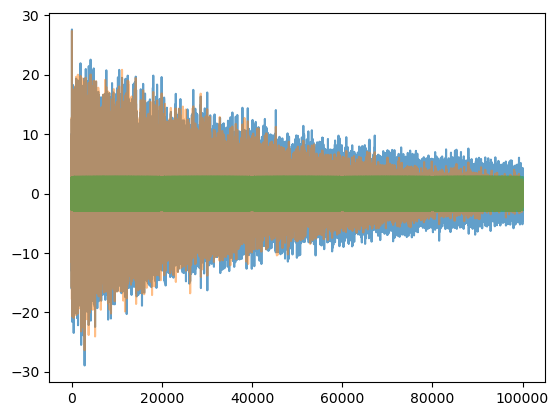

In [26]:
plt.plot(x,alpha=0.7)
plt.plot(noise,alpha=0.5)
plt.plot(carrier,alpha=0.5)

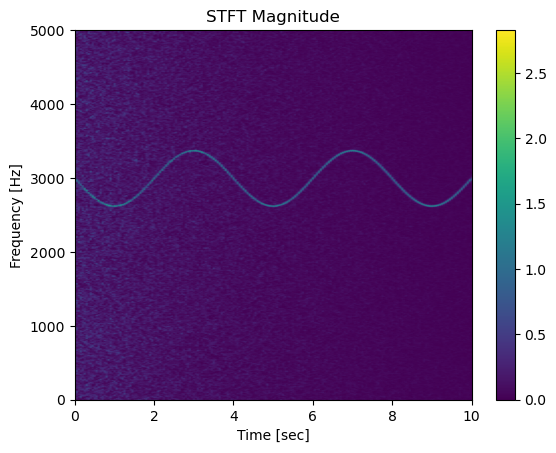

In [9]:
f, t, Zxx = signal.stft(x, fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

In [10]:
E_x = sum(x**2) / fs  # Energy of x
# Calculate a two-sided STFT with PSD scaling:
f, t, Zxx = signal.stft(x, fs, nperseg=1000, return_onesided=False,
                        scaling='psd')
# Integrate numerically over abs(Zxx)**2:
df, dt = f[1] - f[0], t[1] - t[0]
E_Zxx = sum(np.sum(Zxx.real**2 + Zxx.imag**2, axis=0) * df) * dt
# The energy is the same, but the numerical errors are quite large:
np.isclose(E_x, E_Zxx, rtol=1e-2)
#True

True

In [45]:
from scipy.fft import fft, fftfreq
import numpy as np

# Number of sample points
N = 400
# sample spacing
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

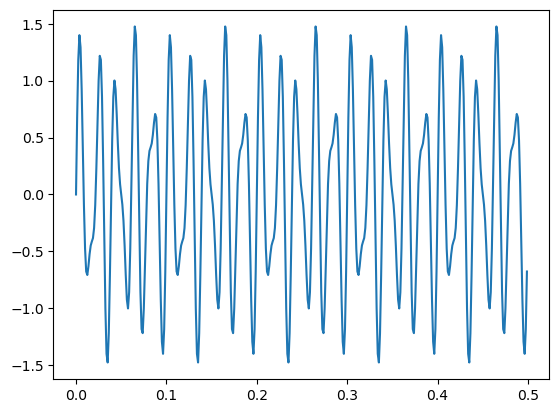

In [46]:
plt.plot(x,y)

In [47]:
N//2

200

In [53]:
xf = fftfreq(N, T)
len(xf)

200

In [51]:
yf = fft(y)
len(yf)

400

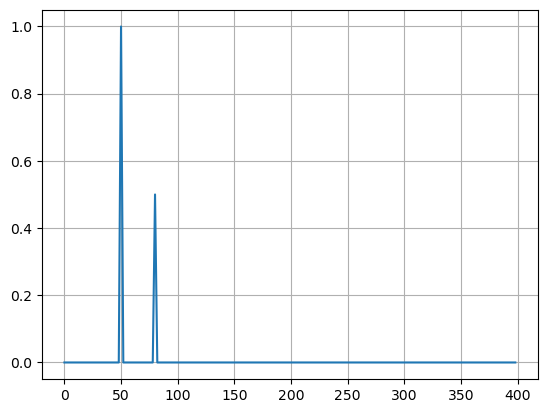

In [48]:
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

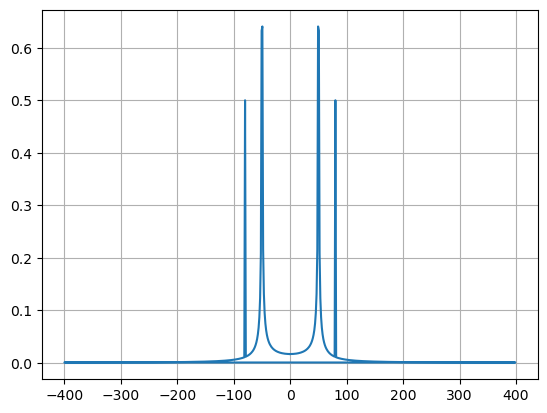

In [38]:
yf = fft(y)
xf = fftfreq(N, T)[:N]

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N]))
plt.grid()
plt.show()

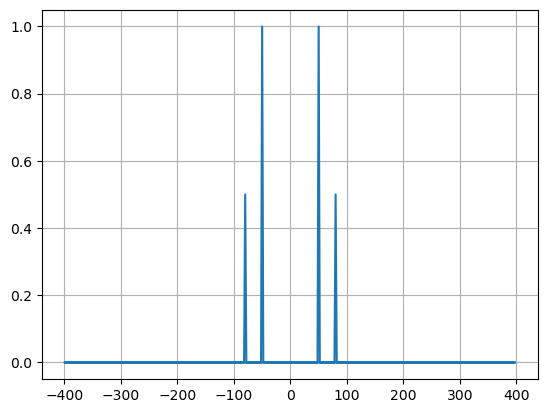

In [52]:
yf = fft(y)
xf = fftfreq(N, T)

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf))
plt.grid()
plt.show()

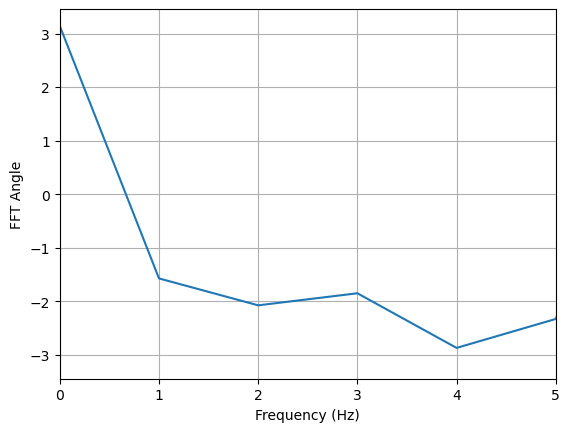

In [40]:
import numpy
from numpy import pi, sin, arange
from pylab import plot, show, xlabel, ylabel, xlim, grid

sampling_rate = 500
sampling_time = 1 / sampling_rate
length = 1 # in seconds
n = sampling_rate * length # number of points

time = arange(0, n * sampling_time, sampling_time)
# Generate sinusoid: frequency=1Hz, phase=0
signal = sin(2 * pi * time)

fft = numpy.fft.fft(signal)
fft_phase = numpy.angle(fft)
fft_freq = numpy.arange(n) * sampling_rate / n

plot(fft_freq, fft_phase)
ylabel("FFT Angle")
xlabel("Frequency (Hz)")
xlim(left=0, right=5)
grid(True)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.io import loadmat,savemat

from os.path import dirname, join as pjoin
import sys
import copy as copy
import os
import time
import random

In [57]:
def retrieve_specific_Xinput_Ytarget(date):
    n = len(date)
    path = 'X_input_mat/'
    mat_fname = []
    data = []
    
    for i in range(n):
        year = date[i][0:4]
        month = date[i][5:7]
        day = date[i][8:]
        print('Xinput_'+ year + '_' + month + '_' + day + '.mat')
    
    # Retrieving .mat files from /res directory for a single day
        mat_fname.append(path + 'Xinput_'+ year + '_' + month + '_' + day + '.mat')
    # .mat file list for a complete day (each .mat data file for 1 of 24 hours)
    
    #Xinput
    for i in range(len(mat_fname)):
        data.append(loadmat(mat_fname[i]))
        
    # Keys for data day dictionary
    data_day = list()
    for s in range(len(data[:])):
        data_day.append(data[s])  
    return data, data_day

In [58]:
# Retreiving data
date = []

date.append('2023_01_10')
date.append('2023_01_01')
date.append('2022_07_01')
date.append('2022_08_01')

data,data_day =retrieve_specific_Xinput_Ytarget(date)


Xinput_2023_01_10.mat
Xinput_2023_01_01.mat
Xinput_2022_07_01.mat
Xinput_2022_08_01.mat


In [59]:
aux = 0
for i in range(len(data)):
    aux += len(data[i]['Xinput'])
                   
print(aux)
Nsamp_win = len(data[0]['Xinput'][0])
Nlabels   = len(data[0]['Ytarget'][0])

X_input = np.zeros((aux,Nsamp_win))
Y_target = np.zeros((aux))

aux = 0
for i in range(len(data)): # 91 days
    for j in range(len(data[i]['Xinput'])):   # variable lenght, number of 'good' events per day
        X_input[aux,:] = data[i]['Xinput'][j]
        Y_target[aux]  = data[i]['Ytarget'][0][j]
        aux += 1
print(aux)

5
5


In [99]:
nsamp = 400
fsamp = 20.0 #[Hz]
dt = 1/fsamp
dt

0.05

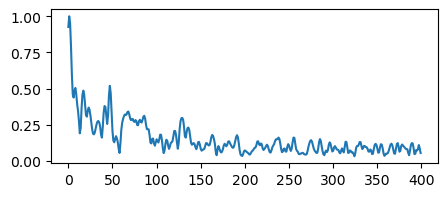

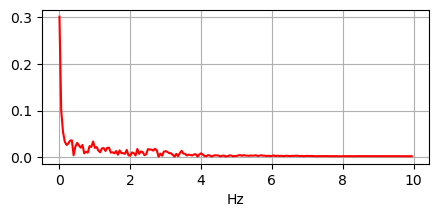

In [100]:
sign = X_input[4,:]
plt.figure(figsize=(5,2))
plt.plot(sign)

Fsig = fft(sign)
xf = fftfreq(nsamp, dt)[:N//2]
plt.figure(figsize = (5,2))
plt.plot(xf, 2.0/N * np.abs(Fsig[0:N//2]),color='red')
plt.xlabel('Hz')
plt.grid()


400


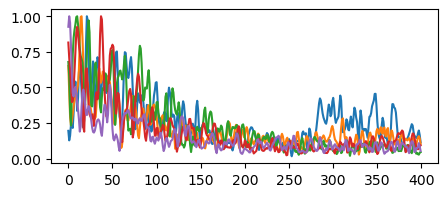

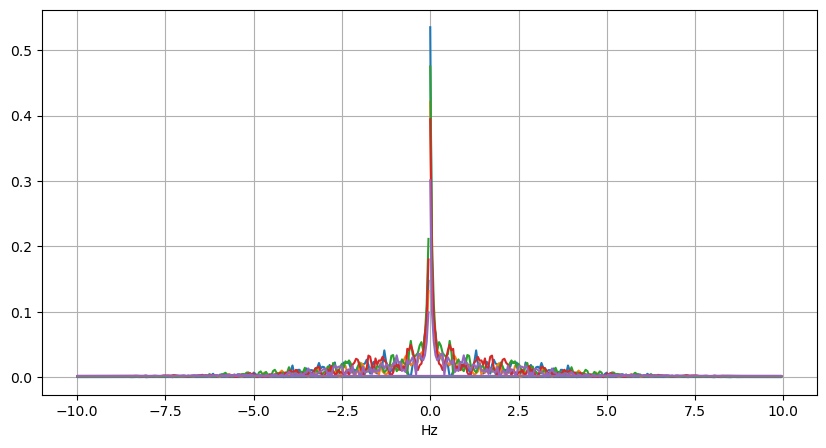

In [103]:
plt.figure(figsize=(5,2))
for i in range(5):
    sign = X_input[i,:]
    
    plt.plot(sign)

plt.figure(figsize = (10,5))
for i in range(5):    
    sign = X_input[i,:]
    Fsig = fft(sign)
    xf = fftfreq(nsamp, dt)#[:N//2]
    #plt.plot(xf, 2.0/N * np.abs(Fsig[0:N//2]))
    plt.plot(xf, 2.0/N * np.abs(Fsig[:]))
    plt.xlabel('Hz')
    plt.grid()
print(len(Fsig))

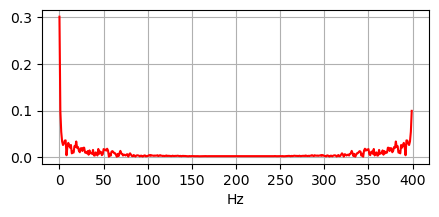

In [97]:
plt.figure(figsize = (5,2))
plt.plot(2.0/N * np.abs(Fsig[:]),color='red')
plt.xlabel('Hz')
plt.grid()

In [75]:
len(Fsig)

400

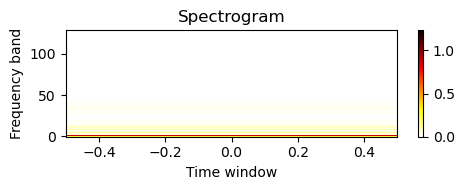

In [130]:
# Power spectral density
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(sign)
plt.figure(figsize=(5,2))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.colorbar()
plt.tight_layout()

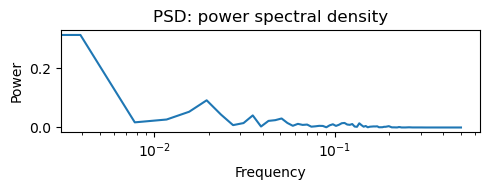

In [110]:
freqs, psd = signal.welch(sign)

plt.figure(figsize=(5, 2))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

In [111]:
psd.shape

(129,)

In [154]:
# Feature computation 
fft_arr = np.zeros((5,nsamp),dtype=complex)
psd_arr = np.zeros((5,nsamp))
sign_arr = np.zeros((5,nsamp))

for i in range(5):
    sign_arr[i,:] = X_input[i,:]
    Fsig = fft(sign_arr[i,:])
    fft_arr[i,:] = Fsig
    freqs, psd_arr[i,:129] = signal.welch(sign_arr[i,:])
    
xf = fftfreq(nsamp, dt)#[:N//2]

Text(0.5, 0.98, 'X input data with some Features for Data Augmentation\n Raw Signal(filtered) -------------------------------- FFT ---------------------------------------------PSD')

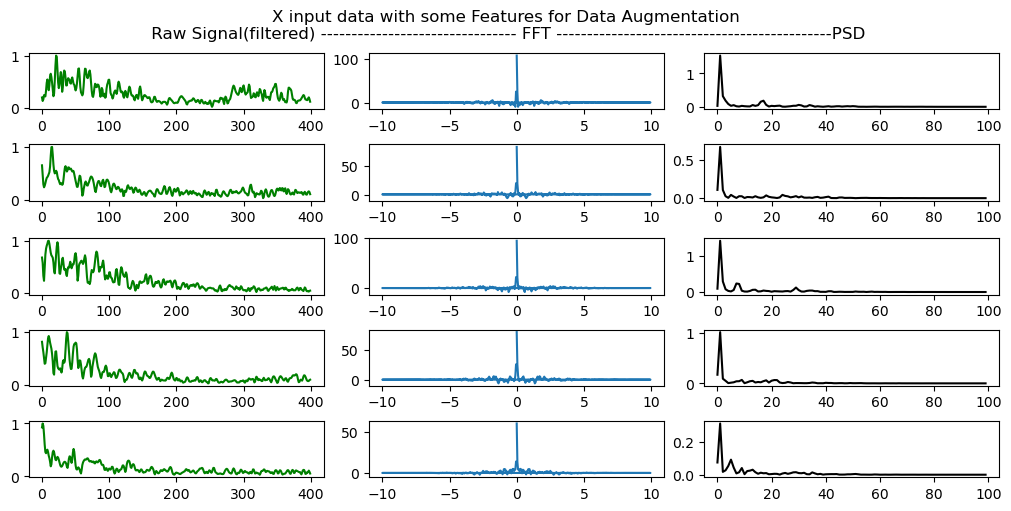

In [173]:
# Feature representation
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [10,5]
fig,ax = plt.subplots(5,3,layout = 'constrained')

for i in range(5):
    ax[i,0].plot(sign_arr[i,:],color = 'green')
    ax[i,1].plot(xf,fft_arr[i,:])
    ax[i,2].plot(psd_arr[i,:100],color='black')
plt.suptitle('X input data with some Features for Data Augmentation\n \
Raw Signal(filtered) -------------------------------- FFT ---------------------------------------------PSD')

# Noise


In [156]:
# Loading X_input noise
path = 'X_input_mat/'
noise_mat = loadmat(path + 'Xinput_noise_Test_Out.mat')
#noise_mat
x_noise = noise_mat['Xinput_noise']
y_noise = noise_mat['Ytarget_noise'].reshape(-1)
x_noise.shape
#y_noise.shape

(5, 400)

In [157]:
# Feature computation 
fft_arr_noise = np.zeros((5,nsamp),dtype=complex)
psd_arr_noise = np.zeros((5,nsamp))
sign_arr_noise = np.zeros((5,nsamp))

for i in range(5):
    sign_arr_noise[i,:] = x_noise[i,:]
    Fsig = fft(sign_arr_noise[i,:])
    fft_arr_noise[i,:] = Fsig
    freqs, psd_arr_noise[i,:129] = signal.welch(sign_arr_noise[i,:])
    
xf = fftfreq(nsamp, dt)#[:N//2]

Text(0.5, 0.98, 'X input Noise with some Features for Data Augmentation\n Noise(filtered) ------------------------------------------ FFT ---------------------------------------------PSD')

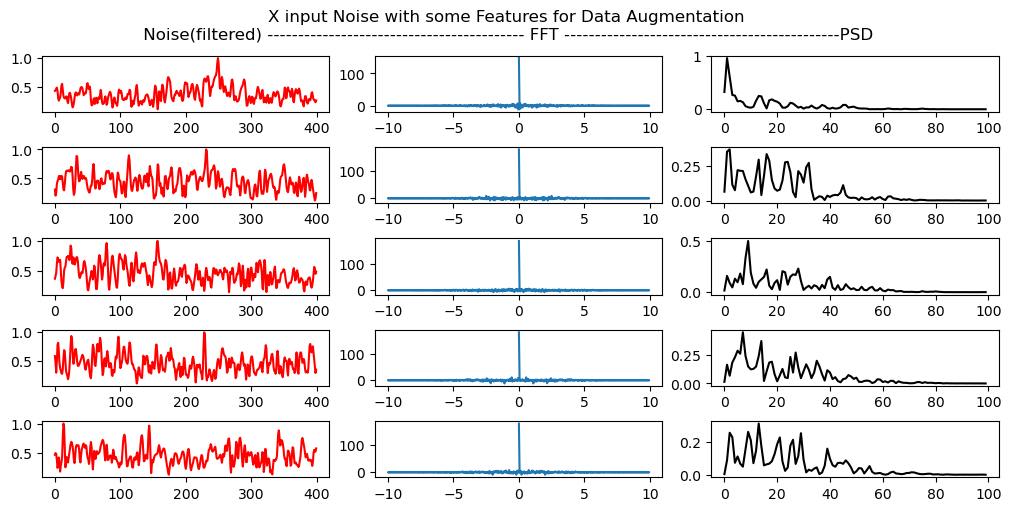

In [172]:
# Feature representation
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [10,5]
fig,ax = plt.subplots(5,3,layout = 'constrained')

for i in range(5):
    ax[i,0].plot(sign_arr_noise[i,:],color = 'red')
    ax[i,1].plot(xf,fft_arr_noise[i,:],'-')
    ax[i,2].plot(psd_arr_noise[i,:100],color='black')
plt.suptitle('X input Noise with some Features for Data Augmentation\n \
Noise(filtered) ------------------------------------------ FFT ---------------------------------------------PSD')

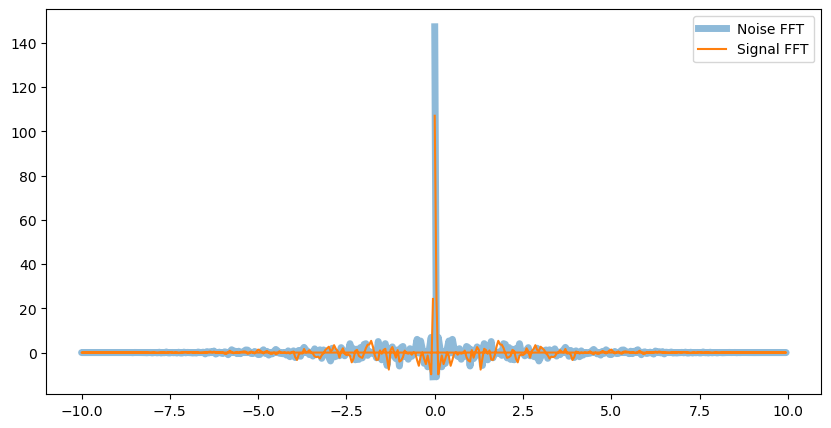

In [166]:
plt.plot(xf,fft_arr_noise[0,:],alpha=0.5,linewidth=5,label = 'Noise FFT')
plt.plot(xf,fft_arr[0,:],label='Signal FFT')
plt.legend()